In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../')
from hipparchus import EchelleSpectrum, Template, cross_corr

Import the echelle spectrum from the `e2ds` file: 

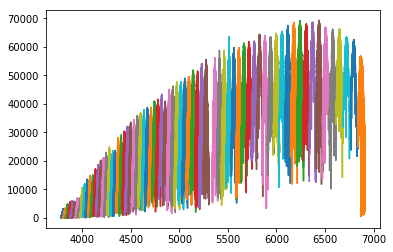

In [36]:
from glob import glob

paths = glob('/Users/bmmorris/data/harps/18Sco/unpacked/e2ds/*e2ds_A.fits')
spectra = []
for path in paths: 
    try: 
        spectrum = EchelleSpectrum.from_e2ds(path)
        spectra.append(spectrum)
    except OSError: 
        # Occassionally a file without a proper header causes a crash
        pass
spectrum.plot()

Continuum normalize each echelle order: 

(0, 1.5)

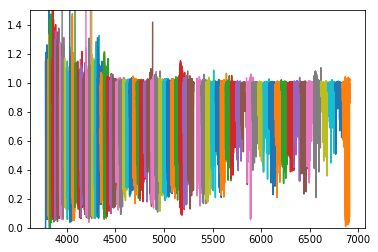

In [37]:
for spectrum in spectra: 
    spectrum.continuum_normalize()

spectrum.plot()
plt.ylim([0, 1.5])

Load a template for TiO at 4000 K, generated by Daniel Kitzmann: 

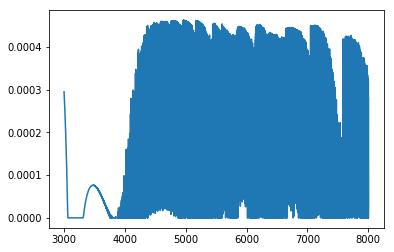

In [38]:
template_tio_3000 = Template.from_npy('../kitzmann/emission_spectrum_3000K_tio.npy')
template_tio_4000 = Template.from_npy('../kitzmann/emission_spectrum_4000K_tio.npy')

template_tio_3000.plot()

Cross-correlate the spectrum against the template: 

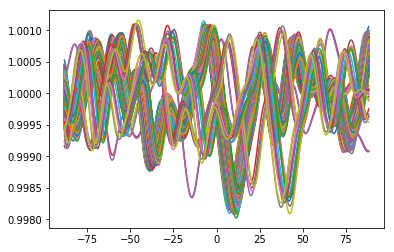

In [39]:
wavelength_0 = 6725
wavelength_1 = 6800

ccfs = []
for spectrum in spectra: 
    ccf_1 = cross_corr(spectrum.nearest_order(wavelength_1), template_tio_4000, start_lam=-2, end_lam=2, n_steps=500, spread_factor=2)
    ccf_1.plot()
    ccfs.append(ccf_1)

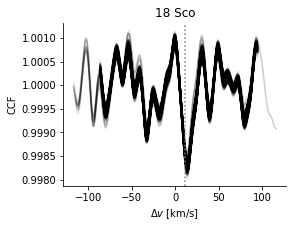

In [41]:
import astropy.units as u

plt.figure(figsize=(4, 3))
for ccf in ccfs: 
    plt.plot(ccf.velocities + ccf.header['HIERARCH ESO DRS BERV'] * u.km/u.s, ccf.ccf/np.median(ccf.ccf), color='k', alpha=0.1)
plt.xlabel('$\Delta v$ [km/s]')
plt.ylabel('CCF')
plt.title('18 Sco')
plt.axvline(11.90, ls=':', color='gray')
for s in ['right', 'top']: 
    plt.gca().spines[s].set_visible(False)
plt.savefig('plots/18Sco.pdf', bbox_inches='tight')

In [10]:
ccf.header['DATE-OBS']

'2015-11-02T08:01:44.869'